In [223]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [224]:
# Importamos los modelos de Clasificación
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [225]:
# Importamos los modelos de Regresión
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [226]:
# Importamos librerias necesarias para trabajar el modelo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedKFold, train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [227]:
df = pd.read_excel('PlayStore.xlsx')

In [228]:
df.head()

,App,Categoría,Valoración,Comentarios,Tamaño(M),Descargas,Tipo,Precio,Clasificación
0,AJ Styles HD Wallpapers,ARTE Y DISEÑO,4.8,48,25.0,"5,000 aprox.",Gratis,0.0,Todo público
1,I Creative Idea,ARTE Y DISEÑO,4.7,353,4.2,"10,000 aprox.",Gratis,0.0,Adolescentes
2,Infinite Painter,ARTE Y DISEÑO,4.1,36815,29.0,"1,000,000 aprox.",Gratis,0.0,Todo público
3,FlipaClip - Cartoon animation,ARTE Y DISEÑO,4.3,194216,39.0,"5,000,000 aprox.",Gratis,0.0,Todo público
4,Text on Photo - Fonteee,ARTE Y DISEÑO,4.4,13880,28.0,"1,000,000 aprox.",Gratis,0.0,Todo público


In [229]:
print(df.shape)
print(df.info())

(9141, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9141 entries, 0 to 9140
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   App            9141 non-null   object 
 1   Categoría      9141 non-null   object 
 2   Valoración     7725 non-null   float64
 3   Comentarios    9141 non-null   int64  
 4   Tamaño(M)      9141 non-null   float64
 5   Descargas      9141 non-null   object 
 6   Tipo           9141 non-null   object 
 7   Precio         9141 non-null   float64
 8   Clasificación  9141 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 642.9+ KB
None


#### Como podemos apreciar, el modelo consta de 9 columnas y 9141 filas
#### Todos los valores, a excepción de la valoración están 100% integros
#### La columna 'Descargas' debe parsearse a un valor numérico

In [230]:
df.Descargas = df.Descargas.apply(lambda x: x.replace(' aprox.', ''))
df.Descargas = df.Descargas.apply(lambda x: x.replace(',', ''))
df.Descargas = df.Descargas.astype(np.float64)
df.Comentarios = df.Comentarios.astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9141 entries, 0 to 9140
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   App            9141 non-null   object 
 1   Categoría      9141 non-null   object 
 2   Valoración     7725 non-null   float64
 3   Comentarios    9141 non-null   float64
 4   Tamaño(M)      9141 non-null   float64
 5   Descargas      9141 non-null   float64
 6   Tipo           9141 non-null   object 
 7   Precio         9141 non-null   float64
 8   Clasificación  9141 non-null   object 
dtypes: float64(5), object(4)
memory usage: 642.9+ KB


In [231]:
df[['Valoración', 'Tamaño(M)', 'Precio']].describe()

,Valoración,Tamaño(M),Precio
count,7725.000000,9141.000000,9141.000000
mean,4.173735,37.047391,1.184885
std,0.544548,98.893732,17.359533
min,1.000000,1.000000,0.000000
25%,4.000000,5.600000,0.000000
50%,4.300000,15.000000,0.000000
75%,4.500000,34.000000,0.000000
max,5.000000,1020.000000,400.000000


In [232]:
df[['Comentarios', 'Descargas']].describe().astype(np.int64)

,Comentarios,Descargas
count,9141,9141
mean,249157,7117898
std,1716578,46203441
min,0,0
25%,22,1000
50%,742,100000
75%,25094,1000000
max,44893888,1000000000


### Analizamos posibles variables explicativas

In [233]:
df.App.value_counts()

ROBLOX                                               9
Candy Crush Saga                                     7
8 Ball Pool                                          7
Bubble Shooter                                       6
Nick                                                 6
                                                    ..
BN Habitat - Property Experts - Buy | Sell | Rent    1
Favorite Soviet cartoons                             1
US Mission - buy gourmet movie KTV                   1
HTC Sense Input - CZ                                 1
Paper flowers instructions                           1
Name: App, Length: 8430, dtype: int64

In [234]:
df.Categoría.value_counts()

FAMILIA                   1770
JUEGO                     1051
HERRAMIENTAS               738
MÉDICO                     433
NEGOCIO                    400
PERSONALIZACIÓN            356
ESTILO DE VIDA             349
DEPORTES                   310
FINANCIERAS                306
PRODUCTIVIDAD              303
SALUD Y BELLEZA            265
COMUNICACIÓN               264
FOTOGRAFÍA                 253
NOTICIAS                   215
DATOS                      212
SOCIAL                     209
COMPRAS                    201
LIBROS Y REFRERENCIAS      197
VIAJES                     192
REPRODUCTORES DE VIDEO     129
EDUCACIÓN                  124
MAPAS Y NAVEGACIÓN         108
ENTRETENIMIENTO            102
COMIDA Y BEBIDA            100
LIBRERIAS                   82
VEHICULOS                   75
CASA Y HOGAR                68
ARTE Y DISEÑO               65
CLIMA                       57
EVENTOS                     57
PADRES                      53
HISTORIETAS                 50
BELLEZA 

In [235]:
# Estableceremos el siguiente diccionario clasificación: { 'Gratis' : 0 , 'Pago' : 1}
df.Tipo.value_counts()

Gratis    8417
Pago       724
Name: Tipo, dtype: int64

In [236]:
# Usaremos LabelEncoder para transformar variables categóricas a numéricas
for col in ['App', 'Categoría', 'Tipo', 'Clasificación']:
    df[col + '_processed'] = LabelEncoder().fit_transform(df[col].astype(str))
df.head()


,App,Categoría,Valoración,Comentarios,Tamaño(M),Descargas,Tipo,Precio,Clasificación,App_processed,Categoría_processed,Tipo_processed,Clasificación_processed
0,AJ Styles HD Wallpapers,ARTE Y DISEÑO,4.8,48.0,25.0,5000.0,Gratis,0.0,Todo público,263,0,0,5
1,I Creative Idea,ARTE Y DISEÑO,4.7,353.0,4.2,10000.0,Gratis,0.0,Adolescentes,4761,0,0,0
2,Infinite Painter,ARTE Y DISEÑO,4.1,36815.0,29.0,1000000.0,Gratis,0.0,Todo público,4824,0,0,5
3,FlipaClip - Cartoon animation,ARTE Y DISEÑO,4.3,194216.0,39.0,5000000.0,Gratis,0.0,Todo público,4114,0,0,5
4,Text on Photo - Fonteee,ARTE Y DISEÑO,4.4,13880.0,28.0,1000000.0,Gratis,0.0,Todo público,7358,0,0,5


Debido a que existen aplicaciones repetidas, agruparemos el dataset bajo los siguientes criterios

* Nombre App
* Categoria
* Valoracion (promedio)
* Comentarios (suma)
* Tamaño (promedio)
* Descargas (suma)
* Precio (promedio)
* Clasificación

<AxesSubplot:>

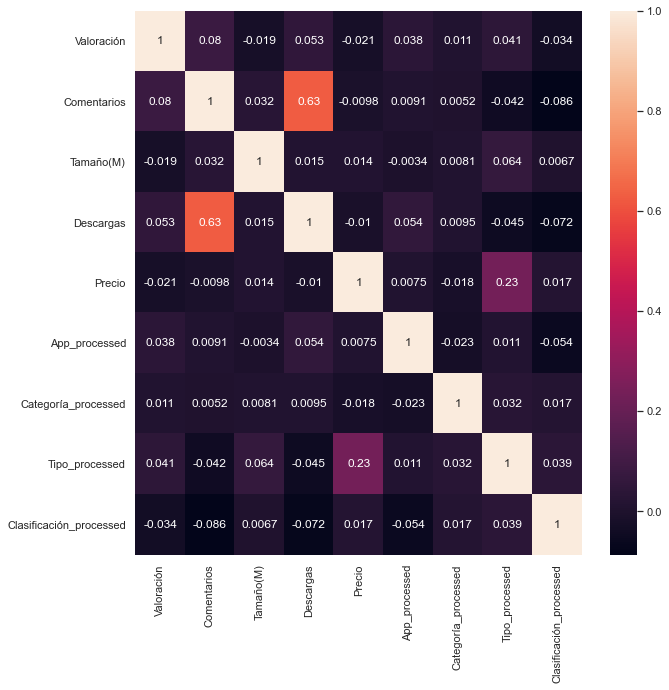

In [237]:
sbn.set(
    rc={
        'figure.figsize' : (10,10)
    }
)
sbn.heatmap(
    df.corr(),
    annot=True
)

<AxesSubplot:>

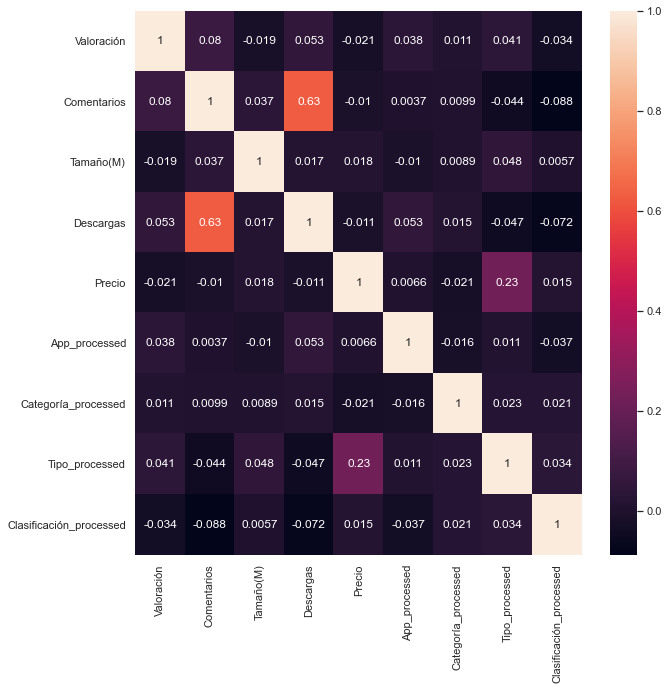

In [238]:
sbn.heatmap(
    df[df.Valoración.notnull()].corr(),
    annot=True
)

In [239]:
df.head()

,App,Categoría,Valoración,Comentarios,Tamaño(M),Descargas,Tipo,Precio,Clasificación,App_processed,Categoría_processed,Tipo_processed,Clasificación_processed
0,AJ Styles HD Wallpapers,ARTE Y DISEÑO,4.8,48.0,25.0,5000.0,Gratis,0.0,Todo público,263,0,0,5
1,I Creative Idea,ARTE Y DISEÑO,4.7,353.0,4.2,10000.0,Gratis,0.0,Adolescentes,4761,0,0,0
2,Infinite Painter,ARTE Y DISEÑO,4.1,36815.0,29.0,1000000.0,Gratis,0.0,Todo público,4824,0,0,5
3,FlipaClip - Cartoon animation,ARTE Y DISEÑO,4.3,194216.0,39.0,5000000.0,Gratis,0.0,Todo público,4114,0,0,5
4,Text on Photo - Fonteee,ARTE Y DISEÑO,4.4,13880.0,28.0,1000000.0,Gratis,0.0,Todo público,7358,0,0,5


In [240]:
print(df.Clasificación.value_counts())
print(df.Clasificación_processed.value_counts())


Todo público          7415
Adolescentes           986
Mayores de 17 años     405
Mayores de 10 años     331
Sólo adultos             2
Sin clasificación        2
Name: Clasificación, dtype: int64
5    7415
0     986
2     405
1     331
3       2
4       2
Name: Clasificación_processed, dtype: int64


# Implementación de Modelos de ML

### Modelos de clasificación

In [241]:
df.drop(labels=['App', 'Categoría', 'Tipo', 'Clasificación'], axis=1, inplace=True)
df = df[df.Valoración.notnull()]
df.head()

,Valoración,Comentarios,Tamaño(M),Descargas,Precio,App_processed,Categoría_processed,Tipo_processed,Clasificación_processed
0,4.8,48.0,25.0,5000.0,0.0,263,0,0,5
1,4.7,353.0,4.2,10000.0,0.0,4761,0,0,0
2,4.1,36815.0,29.0,1000000.0,0.0,4824,0,0,5
3,4.3,194216.0,39.0,5000000.0,0.0,4114,0,0,5
4,4.4,13880.0,28.0,1000000.0,0.0,7358,0,0,5


In [242]:
#Hacemos el split de la data
train_data, test_data, train_label, test_label = train_test_split(
    df,
    df.Tipo_processed,
    test_size=0.20,
    random_state=2
)

print('Los datos para entrenamiento son :',train_data.shape)
print('Los datos para prueba son :',test_data.shape)
print('Los eti para entrenamiento son :',train_label.shape)
print('Los eti para prueba son :',test_label.shape)

Los datos para entrenamiento son : (6180, 9)
Los datos para prueba son : (1545, 9)
Los eti para entrenamiento son : (6180,)
Los eti para prueba son : (1545,)


In [243]:
modelos_clasificacion = []
resultados_clasificacion = []
modelos_clasificacion.append(('KNeighborsClassifier', KNeighborsClassifier()))
modelos_clasificacion.append(('LogisticRegression', LogisticRegression()))
modelos_clasificacion.append(('RandomForestClassifier', RandomForestClassifier()))
modelos_clasificacion.append(('SVC', SVC()))
modelos_clasificacion.append(('DecisionTreeClassifier', DecisionTreeClassifier()))

for nombre, modelo in modelos_clasificacion:
    modelo.fit(train_data, train_label)
    resultado = modelo.score(test_data, test_label)
    resultados_clasificacion.append(resultado*100)
    print('El modelo {} tiene como resultado {:.2f}%'.format(
        nombre,
        resultado*100
    ))

El modelo KNeighborsClassifier tiene como resultado 92.17%
El modelo LogisticRegression tiene como resultado 92.36%
El modelo RandomForestClassifier tiene como resultado 100.00%
El modelo SVC tiene como resultado 92.36%
El modelo DecisionTreeClassifier tiene como resultado 100.00%


In [244]:
# Aplicación del modelo KNeighborsClassifier
KNeighborsClassifier().fit(train_data, train_label)
KNeighborsClassifier.score(test_data, test_label)

TypeError: score() missing 1 required positional argument: 'y'

In [ ]:
print(train_label.value_counts())
print(pd.Series(modelos_clasificacion[2][1].predict(train_data)).value_counts())

0    5719
1     461
Name: Tipo_processed, dtype: int64
0    5719
1     461
dtype: int64


[[5719    0]
 [   0  461]]
[5719    0    0  461]
[[ 461    0]
 [   0 5719]]


Text(66.5, 0.5, 'Actual')

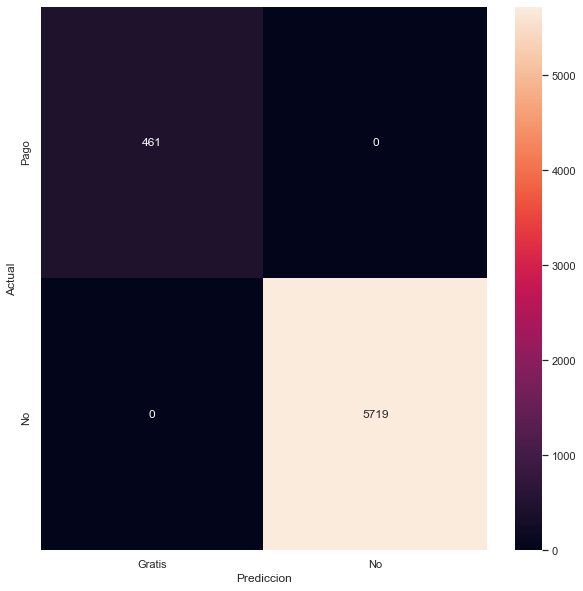

In [ ]:
predict_data = modelos_clasificacion[2][1].predict(train_data)
confusion = confusion_matrix(train_label, predict_data)
print(confusion)
print(confusion.ravel())
vn, fp, fn, vp = confusion.ravel()
matriz = np.array( [[vp, fn], [fp, vn]])
print(matriz)

grafico = plt.subplot()

sbn.heatmap(matriz, annot=True, ax=grafico, fmt='g')
grafico.xaxis.set_ticklabels(['Gratis', 'No'])
grafico.yaxis.set_ticklabels(['Pago', 'No'])
grafico.set_xlabel('Prediccion')
grafico.set_ylabel('Actual')